# Using Machine Learning Techniques to Predict World Happiness Indices of Countries

## Single-variable linear Regression 

In this part, we first explore the data at hand, and figure out the feature we want to use in order to make predictions about the World Happiness Indices of countries. The dataset used in this project come from the Kaggle dataset [__"World Happiness Report"__:](https://www.kaggle.com/datasets/unsdsn/world-happiness)

The dataset includes data from 2015 to 2019 inclusive. First, let us take a glance at the data.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras 
import tensorflow as tf

data_2015 = pd.read_csv(r"Data\2015.csv")
data_2016 = pd.read_csv(r"Data\2016.csv")
data_2017 = pd.read_csv(r"Data\2017.csv")
data_2018 = pd.read_csv(r"Data\2018.csv")
data_2019 = pd.read_csv(r"Data\2019.csv")

def data_summary():
    k = 2015
    for d in [data_2015, 
             data_2016, 
             data_2017,
             data_2018,
             data_2019]:
        print("Data for "+ str(k) + "\n")
        print(d.head(5))
        print("\n" + "-"*60 + "\n")
        k += 1

data_summary()


Data for 2015

       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.

We can see that many of the features are not common throughout the years, as well as having name changes. We clean the data first by dropping any NaN values, and make the tables consistent to the 2018 and 2019 tables. We drop all columns which are not common, and rename them to match each other.

In [3]:
for file in [data_2015, 
             data_2016, 
             data_2017,
             data_2018,
             data_2019]:
    file = file.dropna()

data_2015 = pd.read_csv(r"Data\2015.csv").drop(columns = ['Region', 'Happiness Rank', 'Standard Error', 'Family', 'Dystopia Residual'])
data_2015.rename(columns = {'Happiness Score': 'Score', 'Health (Life Expectancy)': 'Healthy life expectancy', 
                            'Freedom': 'Freedom to make life choices', 'Trust (Government Corruption)': 'Perceptions of corruption', 
                            'Economy (GDP per Capita)': "GDP per capita"}, inplace=True)

data_2016 = pd.read_csv(r"Data\2016.csv").drop(columns = ['Region', 'Happiness Rank', 'Lower Confidence Interval', 
                                                          'Upper Confidence Interval', 'Family', 'Dystopia Residual'])
data_2016.rename(columns = {'Happiness Score': 'Score', 'Health (Life Expectancy)': 'Healthy life expectancy', 
                            'Freedom': 'Freedom to make life choices','Trust (Government Corruption)': 'Perceptions of corruption', 
                            'Economy (GDP per Capita)': "GDP per capita"}, inplace=True)

data_2017 = pd.read_csv(r"Data\2017.csv").drop(columns = ['Happiness.Rank', 'Whisker.high', 'Whisker.low','Family', 'Dystopia.Residual'])
data_2017.rename(columns = {'Happiness.Score': 'Score', 'Health..Life.Expectancy.': 'Healthy life expectancy', 
                            'Freedom': 'Freedom to make life choices', 'Trust..Government.Corruption.': 'Perceptions of corruption', 
                            'Economy..GDP.per.Capita.': "GDP per capita"}, inplace=True)

data_2018 = pd.read_csv(r"Data\2018.csv").drop(columns = ['Overall rank', 'Social support'])
data_2018.rename(columns = {'Country or region': 'Country'}, inplace=True)

data_2019 = pd.read_csv(r"Data\2019.csv").drop(columns = ['Overall rank', 'Social support'])
data_2019.rename(columns = {'Country or region': 'Country'}, inplace=True)

data_lst = []
for df in [data_2015, data_2016, data_2017,data_2018,data_2019]:
    data_lst.append(df[['Country', 'Score', 'GDP per capita', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 
                                   'Perceptions of corruption']])

data_2015, data_2016, data_2017, data_2018, data_2019 = data_lst

data_summary()

Data for 2015

       Country  Score  GDP per capita  Healthy life expectancy  \
0  Switzerland  7.587         1.39651                  0.94143   
1      Iceland  7.561         1.30232                  0.94784   
2      Denmark  7.527         1.32548                  0.87464   
3       Norway  7.522         1.45900                  0.88521   
4       Canada  7.427         1.32629                  0.90563   

   Freedom to make life choices  Generosity  Perceptions of corruption  
0                       0.66557     0.29678                    0.41978  
1                       0.62877     0.43630                    0.14145  
2                       0.64938     0.34139                    0.48357  
3                       0.66973     0.34699                    0.36503  
4                       0.63297     0.45811                    0.32957  

------------------------------------------------------------

Data for 2016

       Country  Score  GDP per capita  Healthy life expectancy  \
0     

As we are looking to form some form of linear regression with a single variable in order to predict the "Score", i.e. the Happiness Index of the country, lets generate a scatter plot and see how each feature correlates with the score.

Text(0.06, 0.5, 'Happiness Score')

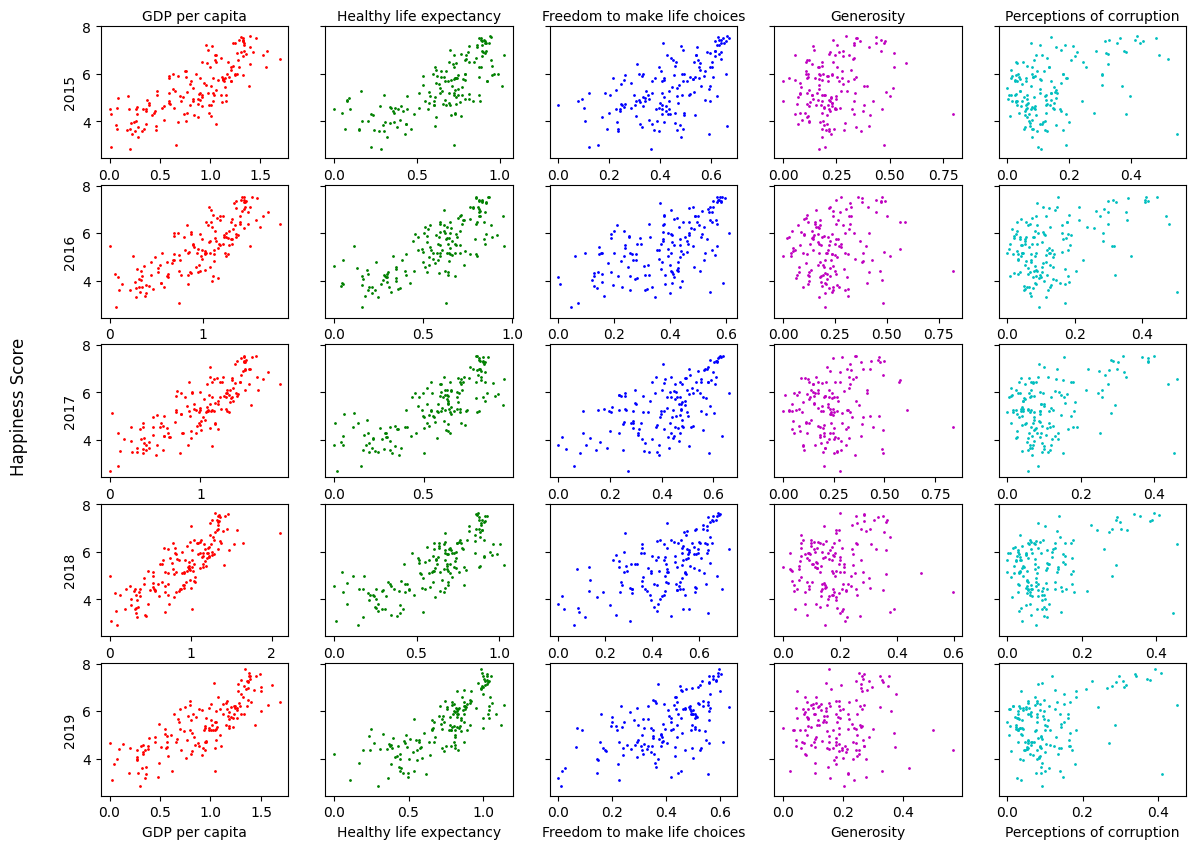

In [4]:
fig_1, ax1 = plt.subplots(5, 5, figsize=(14,10), sharey = True)

colours = ["r", "g", "b", "m", "c"]

for year in enumerate(data_lst):
    for feature in np.arange(2, 7, 1):
        ax1[year[0], feature-2].scatter(year[1].loc[:, (year[1].columns)[feature]], year[1]["Score"], s = 1, color = colours[feature-2])
        
        if feature-2 == 0:
            ax1[year[0], 0].set_ylabel(f"{year[0]+2015}")
        else:
            pass
            
        if year[0] == 0:
            ax1[year[0], feature-2].set_xlabel((year[1].columns)[feature])    
            ax1[year[0], feature-2].xaxis.set_label_position('top') 
        elif year[0] == 4:
            ax1[year[0], feature-2].set_xlabel((year[1].columns)[feature])    
            
fig_1.supylabel("Happiness Score", x=0.06)             



From the scatter plots, we can see that GDP per capita and a healthy life expectancy have the strongest correlation with the Happiness Score, while freedom has a weak correlation, and generosity and perception of corruption have little to no correlation at all. Before looking to use these features to train the model, let us overlay the data of each year onto a single graph, to see whether the weights of each feature are consistent throughout the years. If upon merging, we find out that the yearly data all have different weights, the merged data could have a weakened correlation with Score, which is not beneficial for our traning

Text(0.08, 0.5, 'Happiness Score')

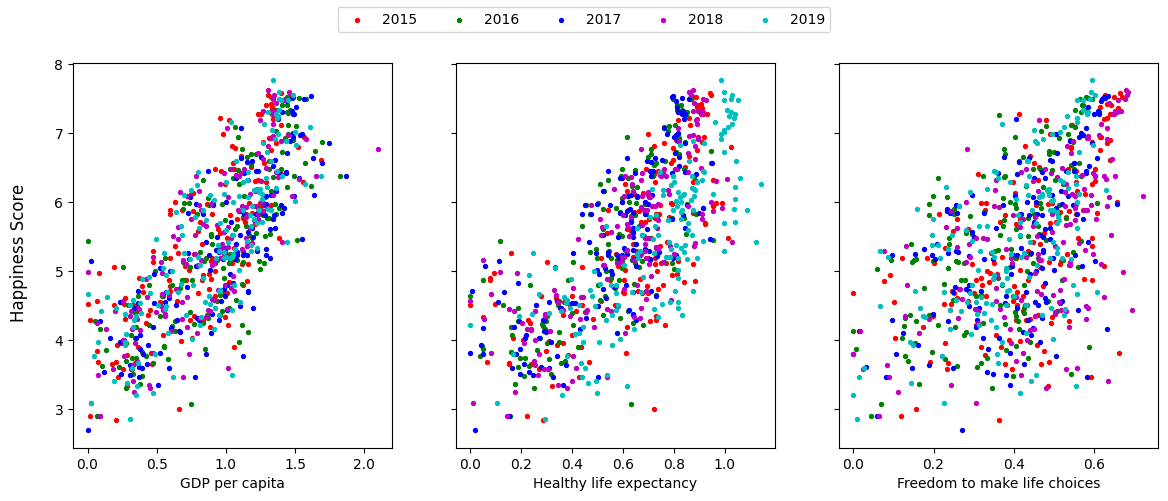

In [5]:
fig_2, ax2 = plt.subplots(1, 3, figsize=(14,5), sharey = True)

colours = ["r", "g", "b", "m", "c"]

for feature in enumerate((data_2015.columns)[2:5]):
    for year in enumerate(data_lst):
        ax2[feature[0]].scatter(year[1].loc[:, feature[1]], year[1]["Score"], color = colours[year[0]], label = f"{2015+year[0]}", s = 8)
    ax2[feature[0]].set_xlabel(feature[1])


handles2, labels2 = ax2[0].get_legend_handles_labels()
fig_2.legend(handles2, labels2, loc='upper center', ncol = len(data_2015.columns))
fig_2.supylabel("Happiness Score", x=0.08)     

It seems that the GDP per capita and Healthy life expectancy maintain their strong correlation with the Happiness Score. The freedom feature is still weakly correlating, but we can see that the spread and deviations of the points from the major data cluster is quite consistent, tending to spread out near the bottom right, and maintaining a tighter boundary to the top left.

Let us try and merge the 2015-2018 data sets together with corresponding features to use as our training set, and 2019 as our test set. Before passing the data into the model, let us normalise the features first:

In [6]:
merged_data = pd.concat(data_lst[:-1])

training_set = (merged_data.copy()).drop(columns = ["Country", "Score"])
training_label = merged_data.copy()["Score"]

feat_lst = ["GDP per capita", "Healthy life expectancy", "Freedom to make life choices"]

normaliser1 = keras.layers.Normalization(input_shape = [1,])
normaliser2 = keras.layers.Normalization(input_shape = [1,])
normaliser3 = keras.layers.Normalization(input_shape = [1,])
norms = [normaliser1, normaliser2, normaliser3]



for feature in enumerate(feat_lst):
    norms[feature[0]].adapt(training_set[feature[1]])
    print("Comparison table for normalised values for " + feature[1] + "\n")
    comparison = pd.DataFrame(data = {feature[1]: training_set[feature[1]],
                                      "Normalised": np.resize(norms[feature[0]](training_set[feature[1]]), 
                                                              new_shape = (int(tf.size(norms[feature[0]](training_set[feature[1]]))),))
                                     }
                             )
    print(comparison.head(10))
    print("\n" + "-"*60 + "\n")


Comparison table for normalised values for GDP per capita

   GDP per capita  Normalised
0         1.39651    1.166712
1         1.30232    0.936689
2         1.32548    0.993248
3         1.45900    1.319319
4         1.32629    0.995226
5         1.29025    0.907212
6         1.32944    1.002919
7         1.33171    1.008463
8         1.25018    0.809357
9         1.33358    1.013029

------------------------------------------------------------

Comparison table for normalised values for Healthy life expectancy

   Healthy life expectancy  Normalised
0                  0.94143    1.477247
1                  0.94784    1.503762
2                  0.87464    1.200975
3                  0.88521    1.244697
4                  0.90563    1.329163
5                  0.88911    1.260830
6                  0.89284    1.276258
7                  0.91087    1.350838
8                  0.90837    1.340497
9                  0.93156    1.436421

-------------------------------------------------

Now using the Sequential method, we compile the model for a single-variable regession by using one node only, such that we get a linear equation.


------------------------------------------------------------

Model for GDP per capita against Score

------------------------------------------------------------
Epoch 1/100
14/14 [==============================] - 0s 12ms/step - loss: 11.0383 - val_loss: 1.9993
Epoch 2/100
14/14 [==============================] - 0s 5ms/step - loss: 1.0808 - val_loss: 0.5376
Epoch 3/100
14/14 [==============================] - 0s 5ms/step - loss: 0.5227 - val_loss: 0.4828
Epoch 4/100
14/14 [==============================] - 0s 5ms/step - loss: 0.4862 - val_loss: 0.4954
Epoch 5/100
14/14 [==============================] - 0s 5ms/step - loss: 0.4837 - val_loss: 0.4953
Epoch 6/100
14/14 [==============================] - 0s 6ms/step - loss: 0.4823 - val_loss: 0.5008
Epoch 7/100
14/14 [==============================] - 0s 6ms/step - loss: 0.4826 - val_loss: 0.5022
Epoch 8/100
14/14 [==============================] - 0s 5ms/step - loss: 0.4818 - val_loss: 0.5056
Epoch 9/100
14/14 [=======================

Text(0.5, 0.05, 'Epoch')

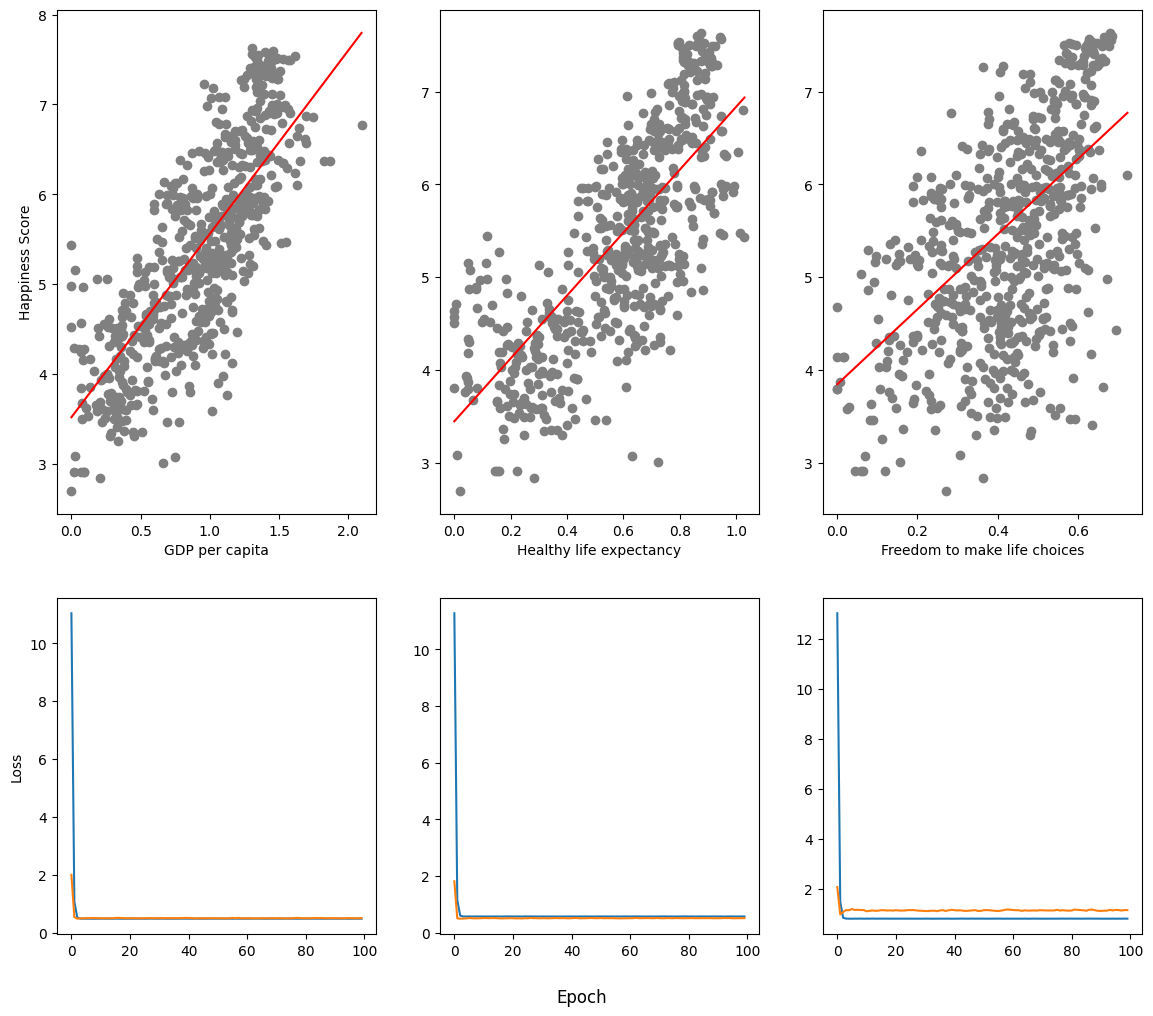

In [9]:
def linear_plot(axes, i, j, real_x, real_y, model):
    axes[i, j].scatter(real_x, real_y, label = "Data", color = "grey")
    x_range = np.linspace(min(real_x), max(real_x), 100)
    axes[i, j].plot(x_range, model.predict(x_range), label = "Model Regression", color = "red")
    if j == 0:
        axes[i, j].set_ylabel("Happiness Score")


def loss_plot(axes, i, j, loss_data):
    axes[i, j].plot(loss_data.history["loss"], label = "Training Loss")
    axes[i, j].plot(loss_data.history["val_loss"], label = "Validation Loss")
    if j == 0:
        axes[i, j].set_ylabel("Loss")

fig_3, ax3 = plt.subplots(2, 3, figsize=(14,12), gridspec_kw={'height_ratios': [3, 2]})

for feature in enumerate(feat_lst):
    print("\n" + "-"*60)
    print("\nModel for " + feature[1] + " against Score\n")
    print("-"*60)
    
    sing_feature_model = keras.models.Sequential([
        norms[feature[0]],
        keras.layers.Dense(units = 1)
    ])

    loss_func = keras.losses.MeanSquaredError()
    optimiser = keras.optimizers.SGD(learning_rate = 0.05)

    sing_feature_model.compile(optimizer = optimiser, loss = loss_func)

    loss_data = sing_feature_model.fit(
        training_set[feature[1]],
        training_label,
        epochs = 100,
        verbose = 1,
        validation_split = 0.3
    )

    sing_feature_model.save(str(feature[1]) + ".keras")

    linear_plot(ax3, 0, feature[0], training_set[feature[1]], training_label, sing_feature_model)
    ax3[0, feature[0]].set_xlabel(feature[1])
    loss_plot(ax3, 1, feature[0], loss_data)

fig_3.supxlabel("Epoch", y=0.05)      

We can see that the losses and validation losses for the first two features, GDP and Health, are quite similar, suggesting that the model was trained successfully. However, in comparison to the Freedom to make decisions feature, it is expected that the loss difference is large, as we can see that the data is quite noisy and spread out. With the models trained, let us apply the model to the 2019 data set, and see its performance.

In [15]:
for feature in enumerate(feat_lst[0: 2]):
    sing_feature_model = keras.models.load_model(str(feature[1]) + ".keras")

    print("\n Comparison Table for " + feature[1] + "\n")
    comparison = pd.DataFrame(data = data_2019[feature[1]], columns = [feature[1]])
    comparison["True Score"] = data_2019["Score"]
    comparison["Predicted Score"] = sing_feature_model.predict(tf.constant(data_2019[feature[1]]))
    comparison["Percentage Difference"] = abs((comparison["True Score"] - comparison["Predicted Score"])/comparison["True Score"]) * 100 
    print(comparison)
    print("\n Average difference = ", comparison["Percentage Difference"].mean(), "% \n")
    print("-" * 60 + "\n")


 Comparison Table for GDP per capita

5/5 [==============================] - 0s 1ms/step
     GDP per capita  True Score  Predicted Score  Percentage Difference
0             1.340       7.769         6.252749              19.516682
1             1.383       7.600         6.340590              16.571190
2             1.488       7.554         6.555083              13.223679
3             1.380       7.494         6.334461              15.472895
4             1.396       7.488         6.367146              14.968670
..              ...         ...              ...                    ...
151           0.359       3.334         4.248763              27.437405
152           0.476       3.231         4.487771              38.897277
153           0.350       3.203         4.230378              32.075496
154           0.026       3.083         3.568511              15.748013
155           0.306       2.853         4.140495              45.127754

[156 rows x 4 columns]

 Average difference =

We see that there is quite a high percentage difference, and the percentage difference increases near the head and tail-ends of the data. I suppose it may be due to the noisy cluster near the low-x, mid-y range of values, which cause the tail end of the linear regression line to be biased upwards, causing the head-end of the line to be tipped lower than expected.

Let us try to evaluate the performance after we remove this cluster and retrain the models. By eye, let us try define the "cluster" as those values which have a feature score of <0.5, and happiness score of >4.8 for the GDP set, and feature score of <0.2 and happiness score of >4.5 for the Health set:

Text(0, 0.5, 'Score')

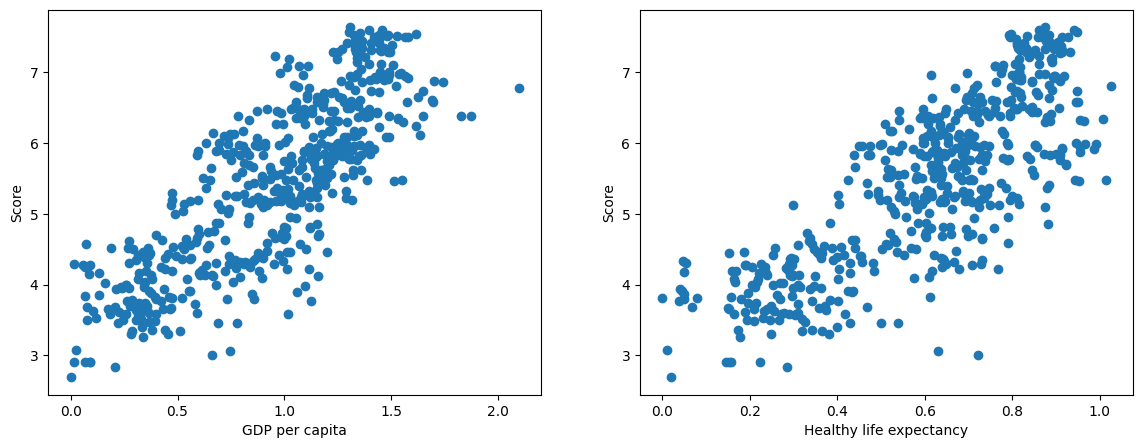

In [39]:
cut_set = (merged_data.copy()).drop(merged_data[(merged_data["GDP per capita"] < 0.4) & (merged_data["Score"] > 4.8)].index)

cut_set = cut_set.drop(cut_set[(cut_set["Healthy life expectancy"] < 0.2) & (cut_set["Score"] > 4.5)].index)

fig_4, ax4 = plt.subplots(1, 2, figsize=(14,5))
ax4[0].scatter(cut_set["GDP per capita"], cut_set["Score"])
ax4[0].set_xlabel("GDP per capita")
ax4[0].set_ylabel("Score")
ax4[1].scatter(cut_set["Healthy life expectancy"], cut_set["Score"])
ax4[1].set_xlabel("Healthy life expectancy")
ax4[1].set_ylabel("Score")


------------------------------------------------------------

Model for GDP per capita against Score

------------------------------------------------------------
Epoch 1/100
13/13 [==============================] - 0s 14ms/step - loss: 12.5950 - val_loss: 2.2118
Epoch 2/100
13/13 [==============================] - 0s 6ms/step - loss: 1.2061 - val_loss: 0.5276
Epoch 3/100
13/13 [==============================] - 0s 6ms/step - loss: 0.5130 - val_loss: 0.4774
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 0.4825 - val_loss: 0.4924
Epoch 5/100
13/13 [==============================] - 0s 6ms/step - loss: 0.4783 - val_loss: 0.4853
Epoch 6/100
13/13 [==============================] - 0s 6ms/step - loss: 0.4791 - val_loss: 0.4806
Epoch 7/100
13/13 [==============================] - 0s 6ms/step - loss: 0.4782 - val_loss: 0.4846
Epoch 8/100
13/13 [==============================] - 0s 6ms/step - loss: 0.4789 - val_loss: 0.5116
Epoch 9/100
13/13 [=======================

Text(0.5, 0.05, 'Epoch')

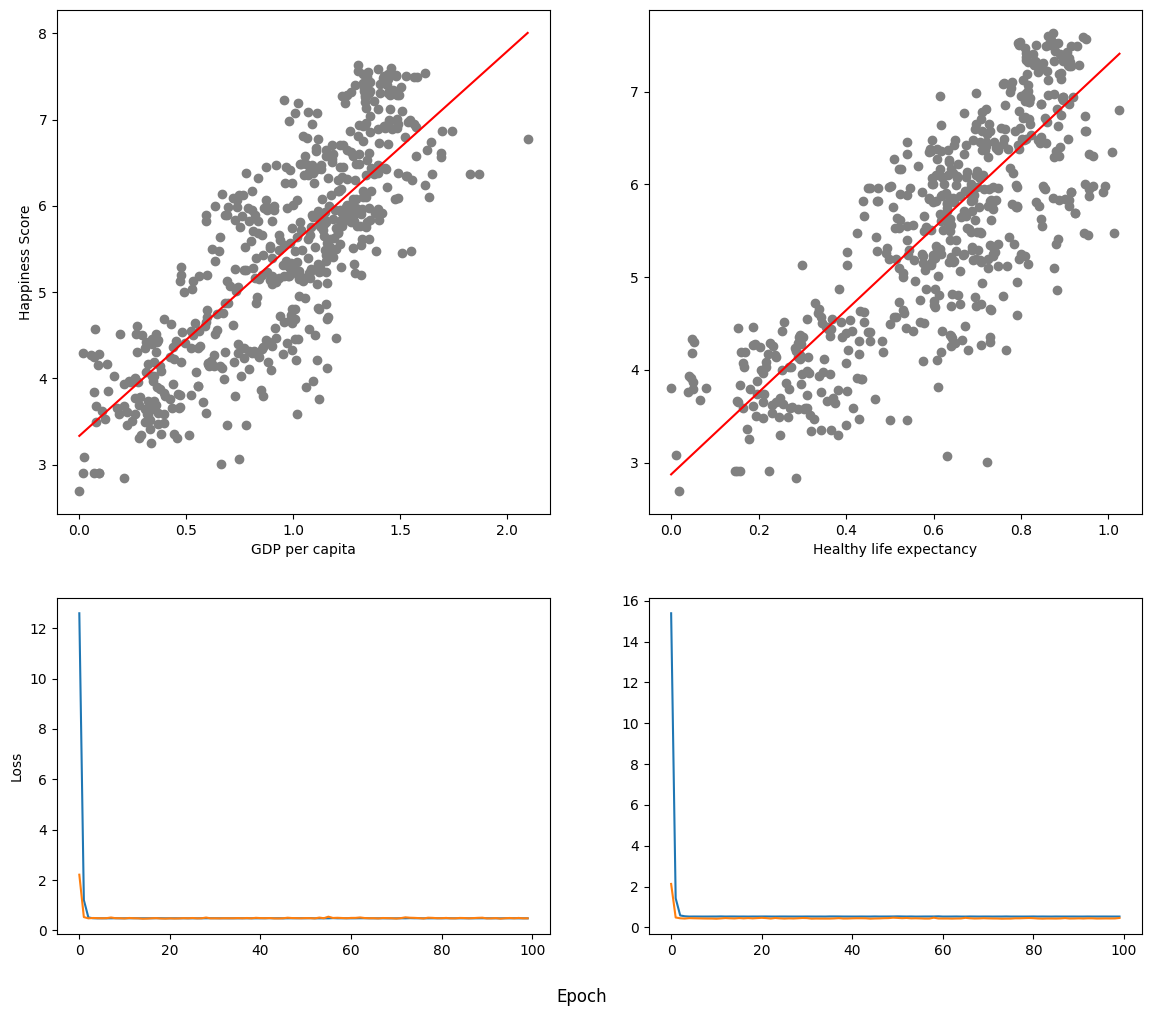

In [53]:
fig_5, ax5 = plt.subplots(2, 2, figsize=(14,12), gridspec_kw={'height_ratios': [3, 2]})

normaliser1cut = keras.layers.Normalization(input_shape = [1,])
normaliser2cut = keras.layers.Normalization(input_shape = [1,])
cut_norms = [normaliser1cut, normaliser2cut]

for feature in enumerate(feat_lst[0:2]):

    cut_norms[feature[0]].adapt(cut_set[feature[1]])
    
    print("\n" + "-"*60)
    print("\nModel for " + feature[1] + " against Score\n")
    print("-"*60)
    
    cut_feature_model = keras.models.Sequential([
        cut_norms[feature[0]],
        keras.layers.Dense(units = 1)
    ])

    loss_func = keras.losses.MeanSquaredError()
    optimiser = keras.optimizers.SGD(learning_rate = 0.05)

    cut_feature_model.compile(optimizer = optimiser, loss = loss_func)

    cutloss_data = cut_feature_model.fit(
        cut_set[feature[1]],
        cut_set["Score"],
        epochs = 100,
        verbose = 1,
        validation_split = 0.3
    )

    cut_feature_model.save(str(feature[1]) + "_cut.keras")

    linear_plot(ax5, 0, feature[0], cut_set[feature[1]], cut_set["Score"], cut_feature_model)
    ax5[0, feature[0]].set_xlabel(feature[1])
    loss_plot(ax5, 1, feature[0], cutloss_data)

fig_5.supxlabel("Epoch", y=0.05)      

In [51]:
for feature in enumerate(feat_lst[0: 2]):
    cut_feature_model = keras.models.load_model(str(feature[1]) + "_cut.keras")

    print("\n Comparison Table for " + feature[1] + " after cut \n")
    comparison = pd.DataFrame(data = data_2019[feature[1]], columns = [feature[1]])
    comparison["True Score"] = data_2019["Score"]
    comparison["Predicted Score"] = cut_feature_model.predict(tf.constant(data_2019[feature[1]]))
    comparison["Percentage Difference"] = abs((comparison["True Score"] - comparison["Predicted Score"])/comparison["True Score"]) * 100 
    print(comparison)
    print("\n Average difference = ", comparison["Percentage Difference"].mean(), "% \n")
    print("-" * 60 + "\n")


 Comparison Table for GDP per capita after cut 

5/5 [==============================] - 0s 2ms/step
     GDP per capita  True Score  Predicted Score  Percentage Difference
0             1.340       7.769         6.345514              18.322637
1             1.383       7.600         6.443387              15.218592
2             1.488       7.554         6.682379              11.538533
3             1.380       7.494         6.436559              14.110505
4             1.396       7.488         6.472977              13.555333
..              ...         ...              ...                    ...
151           0.359       3.334         4.112645              23.354684
152           0.476       3.231         4.378951              35.529266
153           0.350       3.203         4.092160              27.760232
154           0.026       3.083         3.354699               8.812809
155           0.306       2.853         3.992011              39.923276

[156 rows x 4 columns]

 Average d

We see that our hypothesis is not correct. Even upon cutting the data points out, the percentage difference remains the same. Given the constraints of the data, such as the noise and the medium correlation, the percentage difference between the predicted value and real value cannot be further reduced by tweaking the model parameters, simply because the training data does not have a particularly strong correlation (e.g. of around 0.9-1.0) and so it is natural that the linear regression model cannot achieve a perfect 90-100% accuracy.